[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Hypothesis%20Testing/Python/Proportions.ipynb)

# Definitions

Statistical tests on proportions (e.g., is there more of A or B in a sample that consists only of As and Bs?) are commonplace. Below are several kinds of tests of proporotions, including more thorough descriptions of when and how they can be used.

A standard way to present proportional data is via a *contingency table*. Here is a simple example that shows two possible outcomes for two possible groups, which can be useful to keep in mind when reading about the different tests, below:

&nbsp; | Outcome A | Outcome B | Total
-- | -- | -- | --
Group 1 | $n_{A1}$ |	$n_{B1}$ | $n_{A1}+n_{B1}$
Group 2	| $n_{A2}$	| $n_{B2}$ | $n_{A2}+n_{B2}$
Total | $n_{A1}+n_{A2}$ | $n_{B1}+n_{B2}$



# Getting started with code

Matlab code is found [here](https://github.com/PennNGG/Quantitative-Neuroscience/tree/master/Hypothesis%20Testing)

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

## Fisher’s exact test



We want to test for $H_0$: the proportion of outcome A from Group 1 = the proportion of outcome A from Group 2 (see example table above).

Fisher's test is closed form way to get *p*. It is most useful when the number of observations for any entry in a contingency table is small (e.g., see Table 1 [here](https://www.nature.com/articles/4001072)). However, it is also a bit computationally intensive:

$\quad p=\frac{\frac{(R_1!R_2!C_1!C_2!)}{n!}}{n_{A1}!n_{A2}!n_{B1}!n_{B2}!}$,

where $X!=1*2*3 ...* X$, *R* is the number of row elements, *C* is the number of column elements, and $n_{**}$ are the entries in the table.

But we aren't done yet! The *p* we just computed is for the actual, observed values. For a one-tailed test, we need consider all of the other possibilities explicitly. Doing so it outside the scope of this lesson; see [here](https://mathworld.wolfram.com/FishersExactTest.html) for more details.

## Two-proportion z-test


The z-test is used to compare two proportions under two different experimental conditions, with a simple $H_0: 𝑝_1=𝑝_2$. One can imagine the data come from a 2x2 contingency table, but all you are interested in is the overall proportions. 

The test statistic is:

$\quad z=\frac{\hat{p_1}-\hat{p_2}}{\sqrt{pq(\frac{1}{n_1}+\frac{1}{n_2})}}$,

where $\hat{p_1}$ and $\hat{p_2}$ are the sample (measured) proportions, $n_1$ and $n_2$ are the sample sizes, and *p* and *q* are the overall proportions of A and B.

This test is appropriate only with sufficiently large *n*'s ([because](https://stats.stackexchange.com/questions/424446/when-can-we-use-a-z-test-instead-of-a-binomial-test) it is using a [normal distribution](https://github.com/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Gaussian%20(Normal).ipynb) to approximate a [binomial distribution](https://github.com/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Binomial.ipynb))

&nbsp; | Condition 1 | Condition 2
-- | -- | --
Outcome A | 18 | 10
Outcome B | 6 | 15

Compute the p-value for $H_0: p_1=p_2$.

In [ ]:
A1 = 18
A2 = 10
B1 = 6
B2 = 15

# Compute the test statistic
n1 = A1 + B1
n2 = A2 + B2
p1_hat = A1/n1
p2_hat = A2/n2
p = (A1+A2)/(n1+n2)
q = (B1+B2)/(n1+n2)
z = (p1_hat-p2_hat)/np.sqrt(p*q*(1/n1+1/n2))

# The p-value is the probability of obtaining the test 
# statistic under the Null hypothesis, which is a standard 
# normal distribution. We are doing a two-tailed test, 
# which means that we want to know the probability of 
# obtaining a value at least as extreme as the test 
# statistic in either direction. Therefore, we:
#  1. Take the absolute value of the z-score (again, because
#     we want to test in both directions)
#  2. Use the cumulative normal function to compute the 
#     probability of obtaining a value less than or equal
#     to that value from the null distribution (mu=0, sigma=1)
#  3. Take 1-that cumumulative probability to get the 
#     probability of obtaining a value *greater* than or equal
#     to that value from the null distribution (mu=0, sigma=1)
#  4. Double the answer to get the two-tailed value
p = 2*(1-st.norm.cdf(np.abs(z)))
print(f'p={p:.4f}')

2.4748737341529163
p=0.0133


## Pearson’s chi-square test


The Pearson's chi-square test is among the most commonly used statistical tests today (an interesting history of its development is [here](https://www.jstor.org/stable/1402731?seq=1)). It is a [non-parametric test](https://zenodo.org/records/1430618) in that it does not make any assumptions about the distribution of the data you are testing (but assumes that you have enough data for the chi-square distribution to be relevant).

Two forms of this test are typically used, as described below. Both use the following chi-square test statistic, which is computed as the sum of the squared differences between observed (*O*) and expected (*E*) frequencies (be sure to use the raw numbers of observations, and not the percentages or proportions, when computing this test statistic!), as a proportion of the expected frequencies:

$\quad \chi^2=\sum\limits_{i=1}^n\frac{(O_i-E_i)^2}{E_i}$

### Chi-square goodness-of-fit test

This test is used to assess whether or not a categorical variable follows a particular, hypothesized distribution. Thus, the observed frequencies are your data, and the expected frequences are those from your hypothesized distribution.

As an example, imagine that you are recording in the region of the inferotemporal cortex that responds selectively to faces. You are testing whether these neurons are sensitive to handsome or non-handsome faces. For handsome faces, you present a stimulus that we will call "Yale" and record neuronal activity from multiple presentations. For non-handsome faces, you present a different stimulus that we will arbitrarily call "Josh" and record neuronal activity multiple presentations. From these recordings, you calculate an index from the neuron's average firing rate that measures the neurons' selectivity for handsomeness: a value of 0 indicates that it responds equally well to Yale and Josh, a value of >0 indicates that it responds more strongly to handsome Yale, and a value of <0 indicates that it responds more strongly to non-handsome Josh. You calculate this index for each of your neurons and find that the sample mean is 0.8 (assume you have enough neurons, say *n*=1000, so that the distribution is ~normal) and then conduct a [t-test](https://github.com/PennNGG/Quantitative-Neuroscience/blob/master/Hypothesis%20Testing/Python/t-Tests.ipynb) to test for the probability of obtaining this sample mean, given a null hypothesis that the mean=0. If you obtain a *p*-value (which will depend on the sample standard deviation, of course) less than your cutoff (e.g., $\alpha=0.05$), then you reject the null hypothesis and conclude that, on average, inferotemporal neurons respond preferentially to handsome Yale. 

But, what if you wanted to ask a different question: what is the probability that you would have obtained the observed proportion of handsome Yale neurons by chance, given our cutoff of $\alpha=0.05$.

A chi-square test allows you to address this question. This is a measure of how far a sample distribution deviates from a theoretical distribution. $H_0$: did the sample data come from a population having a 95:5 ratio of handsome Yale:non-handsome Josh neurons? 

The code below shows how the probability changes as a function of the number of observed handsome Yale neurons and as a function of the sample size. This test is often referred to as a measure of goodness of fit; though, depending on your data, it can also be a poorness of fit.

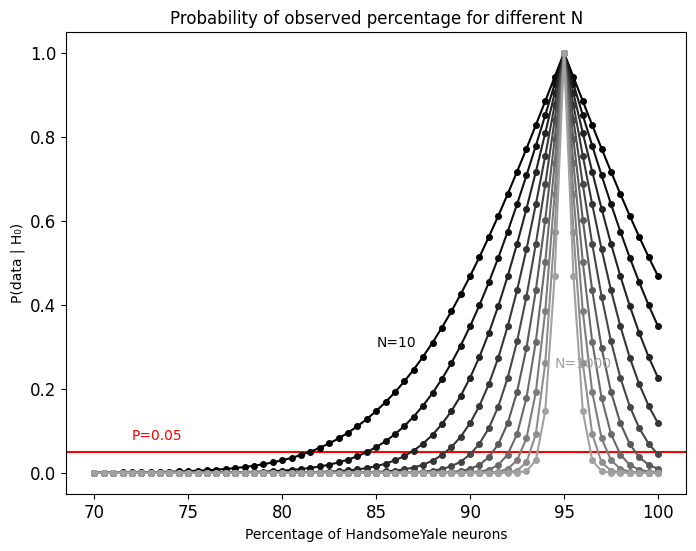

In [11]:
# Compute p values
N = np.logspace(1, 3, 10)  # 10^1 to 10^3
proportion = np.arange(0.7, 1.0 + 0.005, 0.005)  # 0.7 to 1.0 step 0.005

ps = np.full((len(N), len(proportion)), np.nan)

# Degrees of freedom
df = 1

# Loop over N and proportion
for ii in range(len(N)):
    for jj in range(len(proportion)):
        handsomeYale = proportion[jj] * N[ii]
        nonHandsomeJosh = N[ii] - handsomeYale
        theoreticallyHandsome = 0.95 * N[ii]
        theoreticallyNonHandsome = N[ii] - theoreticallyHandsome

        chiSquare = ((handsomeYale - theoreticallyHandsome) ** 2) / theoreticallyHandsome + \
                    ((nonHandsomeJosh - theoreticallyNonHandsome) ** 2) / theoreticallyNonHandsome
        ps[ii, jj] = 1 - st.chi2.cdf(chiSquare, df)

# --- Plotting ---
plt.figure(figsize=(8, 6))
plt.axhline(0.05, color='red')  # P=0.05 reference line

for ii in range(len(N)):
    gray_val = (ii) / len(N) * 0.7
    plt.plot(proportion * 100, ps[ii, :], '.-', markersize=8, color=(gray_val, gray_val, gray_val))

plt.text(85, 0.3, f'N={N[0]:.0f}')
plt.text(94.5, 0.25, f'N={N[-1]:.0f}', color=(len(N)-1)/len(N) * 0.7 * np.ones(3))
plt.text(72, 0.08, 'P=0.05', color='red')

plt.xlabel('Percentage of HandsomeYale neurons')
plt.ylabel('P(data | H₀)')
plt.title('Probability of observed percentage for different N')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Chi-squared test of independence

This is a test of [group differences for categorical variables](https://pmc.ncbi.nlm.nih.gov/articles/PMC3900058/). It can be thought of as a more general case of the goodness-of-fit test, described above.

In the case of two proportions, this test is [equivalent](https://stats.stackexchange.com/questions/173415/at-what-level-is-a-chi2-test-mathematically-identical-to-a-z-test-of-propo) to the two-proportion z-test (when they are computed in [comparable](https://www.statisticshowto.com/what-is-the-yates-correction/) ways). The advantage of the ch-square test is that it can be applied to data consisting of more than two proportions.

Here the expected values (*E* in the equation above) correspond to the frequencies that would be expected under the null hypothesis that there are no group-level differences. Fortunately, computing these values is straightforward in the context of a contingency table. For each element in the table, the expected value is just: (<row total> X <column total >) <total sample size>.

Also note that for a table with *m* rows and *n* columns, the degrees of freedom used to define the shape of the $\chi^2$ distribution is (*m*-1)(*n*-1) (because proportions must add to one for each row and each column, thus once you define all but one value in each row or column the final value is determined).

As an example, imagine the following data describing the fur color of a sample of puppies and kittens:

&nbsp; | black	| brown	| blond	| red
-- | -- | -- | -- | -- 
Puppies | 32 | 43 | 16 | 9
Kittens | 55 | 65 | 65 | 26

We want to test the following $H_0$: fur color is independent of pet in the population sampled.

The chi-squared statistic is:

$\quad \sum\frac{(f_{ij}-f^{*}_{ij})^2)}{f^{*}_{ij}}$, 

where $f_{ij}$ is the observed proportion and $f^{*}_{ij}$ is the theoretical value based on the null hypothesis. 

The code below computes the $\chi^2$ and associated *p*-value.

In [12]:
puppies = [32,43,16,9]
kittens = [55,65,65,26]

# Create contingency table
table = np.array([puppies, kittens])

# Perform Chi-squared test
chi2_stat, p_value, dof, expected = st.chi2_contingency(table)

print(f"Chi-squared statistic: {chi2_stat:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.4f}")
print("Expected counts:")
print(expected)

Chi-squared statistic: 10.1347
Degrees of freedom: 3
P-value: 0.0175
Expected counts:
[[27.97427653 34.7266881  26.04501608 11.25401929]
 [59.02572347 73.2733119  54.95498392 23.74598071]]


## McNemar’s test (paired data)

This test is analogous to a paired t-test in that the data is paired. It is essentially a modification of our initial chi-squared test.

The test is applied to a 2x2 contingency table, which counts the outcomes of the two tests from *N* subjects:

&nbsp; | Test 2 positive | Test 2 negative | Total
-- | -- | -- | --
Test 1 positive | $n_{++}$ |	$n_{+-}$ | $n_{++} + n_{+-}$
Test 1 negative	| $n_{-+}$	| $n_{--}$ | $n_{-+} + n_{--}$
Total | $n_{++} + n_{-+}$ | $n_{+-} + n_{--}$

The Null hypothesis is that the row and column distributions are the same (i.e., the table has "marginal homogeneity"), which would imply that the tests do not differ in their efficacy. Specifically, $H_0$ is that: $p(n_{++}) + p(n_{+-}) = p(n_{++}) + p(n_{-+})$, and $p(n_{-+}) + p(n_{--}) = p(n_{+-}) + p(n_{--})$, which is true if $p(b) = P(c)$.

The test statistic is:

$\chi^2=\frac{|(n_{+-}-n_{-+}|-1)^2}{n_{+-}+n_{-+}}$

Here is an interesting example that uses this test to [assess the contribution of STN stimulation to ameliorating hallucinations in patients with Parkinsons](https://www.karger.com/Article/Abstract/195719).

As another example, imagine that we are assessing the degree to which two different probes can elicit a perception of an itch when they are applied to your left arm (probe 1) and then your right arm (probe 2). You get the following data when you survey subjects and ask them whether they perceive "itch":

&nbsp; | Probe 1 causes itch | Probe 1 doesn't cause itch
-- | -- | --
Probe 2 causes itch | 	11 |	6
Probe 2 doesn't cause itch	| 10	| 24

Here, our $H_0$ is the proportion of subjects experiencing itch is the same for both probes. 



In [7]:
df = 1 
n10 = 6
n01 = 10

chi_square = ((np.abs(n10-n01)-1)**2)/(n10+n01)
p = 1 - st.chi2.cdf(chi_square, df)
print(f'H0: proportion of persons experiencing itch is the same with both\
 probes: p={p:.2f}')


0.5625
H0: proportion of persons experiencing itch is the same with both probes: p=0.45


# Additional Resources


# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania